In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots


In [113]:
data = pd.read_csv('/content/data.csv')

In [3]:
genre_data = pd.read_csv('/content/data_by_genres.csv')

In [4]:
artist_data = pd.read_csv('/content/data_by_artist.csv')

In [112]:
year_data = pd.read_csv('/content/data_by_year.csv')

In [6]:
genre_data.head(2)

,mode,genres,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity,key
0,1,21st century classical,0.979333,0.162883,1.602977e+05,0.071317,0.606834,0.3616,-31.514333,0.040567,75.336500,0.103783,27.833333,6
1,1,432hz,0.494780,0.299333,1.048887e+06,0.450678,0.477762,0.1310,-16.854000,0.076817,120.285667,0.221750,52.500000,5


In [7]:
artist_data.head(2)

,mode,count,acousticness,artists,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity,key
0,1,9,0.590111,"""Cats"" 1981 Original London Cast",0.467222,250318.555556,0.394003,0.011400,0.290833,-14.448,0.210389,117.518111,0.389500,38.333333,5
1,1,26,0.862538,"""Cats"" 1983 Broadway Cast",0.441731,287280.000000,0.406808,0.081158,0.315215,-10.690,0.176212,103.044154,0.268865,30.576923,5


In [8]:
year_data.head(2)

,mode,year,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity,key
0,1,1921,0.886896,0.418597,260537.166667,0.231815,0.344878,0.20571,-17.048667,0.073662,101.531493,0.379327,0.653333,2
1,1,1922,0.938592,0.482042,165469.746479,0.237815,0.434195,0.24072,-19.275282,0.116655,100.884521,0.535549,0.140845,10


In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 170653 entries, 0 to 170652
Data columns (total 19 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   valence           170653 non-null  float64
 1   year              170653 non-null  int64  
 2   acousticness      170653 non-null  float64
 3   artists           170653 non-null  object 
 4   danceability      170653 non-null  float64
 5   duration_ms       170653 non-null  int64  
 6   energy            170653 non-null  float64
 7   explicit          170653 non-null  int64  
 8   id                170653 non-null  object 
 9   instrumentalness  170653 non-null  float64
 10  key               170653 non-null  int64  
 11  liveness          170653 non-null  float64
 12  loudness          170653 non-null  float64
 13  mode              170653 non-null  int64  
 14  name              170653 non-null  object 
 15  popularity        170653 non-null  int64  
 16  release_date      17

In [10]:
genre_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2973 entries, 0 to 2972
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   mode              2973 non-null   int64  
 1   genres            2973 non-null   object 
 2   acousticness      2973 non-null   float64
 3   danceability      2973 non-null   float64
 4   duration_ms       2973 non-null   float64
 5   energy            2973 non-null   float64
 6   instrumentalness  2973 non-null   float64
 7   liveness          2973 non-null   float64
 8   loudness          2973 non-null   float64
 9   speechiness       2973 non-null   float64
 10  tempo             2973 non-null   float64
 11  valence           2973 non-null   float64
 12  popularity        2973 non-null   float64
 13  key               2973 non-null   int64  
dtypes: float64(11), int64(2), object(1)
memory usage: 325.3+ KB


In [11]:
data.duplicated().sum()

0

In [12]:
genre_data.duplicated().sum()

0

In [13]:
artist_data.duplicated().sum()

0

In [14]:
data.isnull().sum()

,0
valence,0
year,0
acousticness,0
artists,0
danceability,0
duration_ms,0
energy,0
explicit,0
id,0
instrumentalness,0


In [114]:
def decades(year):
    period_start = int(year/10) * 10
    decade = f"{period_start}'s"
    return decade

data['decade'] = data['year'].apply(decades)
data.head()

,valence,year,acousticness,artists,danceability,duration_ms,energy,explicit,id,instrumentalness,key,liveness,loudness,mode,name,popularity,release_date,speechiness,tempo,decade
0,0.0594,1921,0.982,"['Sergei Rachmaninoff', 'James Levine', 'Berli...",0.279,831667,0.211,0,4BJqT0PrAfrxzMOxytFOIz,0.878000,10,0.665,-20.096,1,"Piano Concerto No. 3 in D Minor, Op. 30: III. ...",4,1921,0.0366,80.954,1920's
1,0.9630,1921,0.732,['Dennis Day'],0.819,180533,0.341,0,7xPhfUan2yNtyFG0cUWkt8,0.000000,7,0.160,-12.441,1,Clancy Lowered the Boom,5,1921,0.4150,60.936,1920's
2,0.0394,1921,0.961,['KHP Kridhamardawa Karaton Ngayogyakarta Hadi...,0.328,500062,0.166,0,1o6I8BglA6ylDMrIELygv1,0.913000,3,0.101,-14.850,1,Gati Bali,5,1921,0.0339,110.339,1920's
3,0.1650,1921,0.967,['Frank Parker'],0.275,210000,0.309,0,3ftBPsC5vPBKxYSee08FDH,0.000028,5,0.381,-9.316,1,Danny Boy,3,1921,0.0354,100.109,1920's
4,0.2530,1921,0.957,['Phil Regan'],0.418,166693,0.193,0,4d6HGyGT8e121BsdKmw9v6,0.000002,3,0.229,-10.096,1,When Irish Eyes Are Smiling,2,1921,0.0380,101.665,1920's


In [115]:
data['artists'] = data['artists'].str.replace('[','').str.replace(']','').str.replace("'",'')

#EXPLORATORY DATA ANALYSIS

<Axes: xlabel='decade', ylabel='count'>

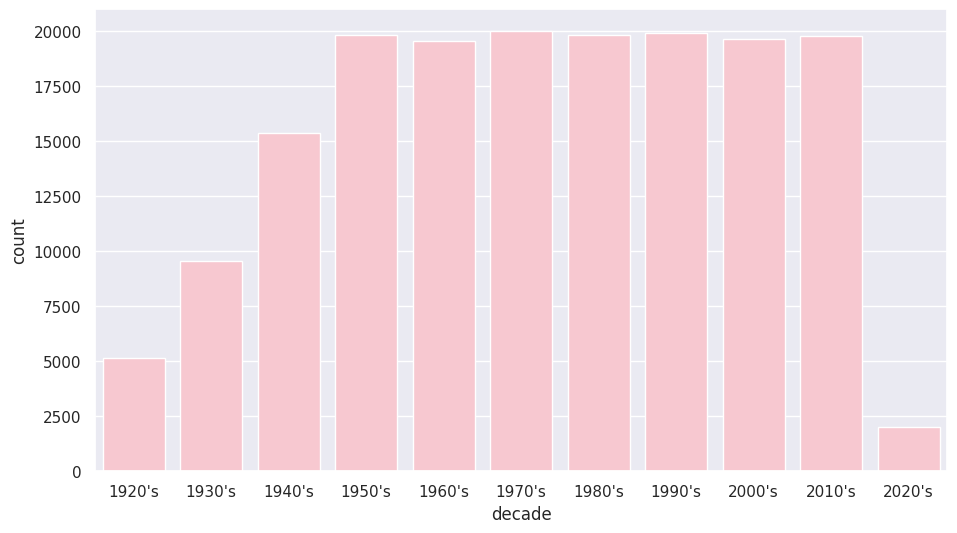

In [17]:
sns.set(rc={'figure.figsize':(11 ,6)})
sns.countplot(data = data[['decade']], x= 'decade', color= 'pink')

In [18]:
sound_features = ['acousticness', 'danceability', 'energy', 'instrumentalness', 'liveness', 'valence']

In [19]:
fig = px.line(year_data, x='year', y=sound_features, title='Trend of various sound features over decades')
fig.show()

In [20]:
fig2 = px.line(year_data, x='year', y='loudness', title='Trend of loudness over decades')
fig2.show()

In [21]:
genre_data.head()

,mode,genres,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity,key
0,1,21st century classical,0.979333,0.162883,1.602977e+05,0.071317,0.606834,0.361600,-31.514333,0.040567,75.336500,0.103783,27.833333,6
1,1,432hz,0.494780,0.299333,1.048887e+06,0.450678,0.477762,0.131000,-16.854000,0.076817,120.285667,0.221750,52.500000,5
2,1,8-bit,0.762000,0.712000,1.151770e+05,0.818000,0.876000,0.126000,-9.180000,0.047000,133.444000,0.975000,48.000000,7
3,1,[],0.651417,0.529093,2.328809e+05,0.419146,0.205309,0.218696,-12.288965,0.107872,112.857352,0.513604,20.859882,7
4,1,a cappella,0.676557,0.538961,1.906285e+05,0.316434,0.003003,0.172254,-12.479387,0.082851,112.110362,0.448249,45.820071,7


In [22]:
genre_data['popularity'].sort_values(ascending=False).head(10)

,popularity
237,80.666667
2778,80.000000
2533,80.000000
2755,80.000000
46,78.500000
536,78.500000
37,77.312500
31,77.000000
2383,77.000000
1239,77.000000


In [23]:
top10 = genre_data.sort_values(by='popularity', ascending=False).head(10)
top10

,mode,genres,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity,key
237,1,basshall,0.213167,0.81800,169799.166667,0.630167,0.000020,0.081067,-6.627833,0.134833,115.092500,0.588667,80.666667,2
2778,0,turkish edm,0.008290,0.69800,186700.000000,0.719000,0.000004,0.326000,-4.923000,0.045500,120.062000,0.364000,80.000000,0
2533,1,south african house,0.043833,0.84700,311854.333333,0.562333,0.130339,0.075133,-7.719000,0.050733,123.676333,0.834333,80.000000,1
2755,1,trap venezolano,0.044600,0.87700,231848.000000,0.777000,0.000035,0.086300,-4.246000,0.117000,102.020000,0.706000,80.000000,1
46,0,alberta hip hop,0.330000,0.88500,144000.000000,0.685000,0.000000,0.148000,-6.429000,0.062700,99.954000,0.937000,78.500000,11
536,0,chinese electropop,0.002570,0.66000,217088.000000,0.787000,0.000000,0.323000,-4.592000,0.032000,142.018000,0.199000,78.500000,1
37,0,afroswing,0.318450,0.71175,179995.375000,0.580187,0.000258,0.189950,-7.016687,0.195563,83.250125,0.676625,77.312500,11
31,0,afro soul,0.006270,0.76600,202627.000000,0.873000,0.000000,0.076400,-6.381000,0.143000,126.988000,0.743000,77.000000,11
2383,1,russian dance,0.005610,0.65300,198095.000000,0.945000,0.915000,0.439000,-2.634000,0.096000,126.093000,0.326000,77.000000,5
1239,1,guaracha,0.009030,0.74500,189818.000000,0.972000,0.465000,0.297000,-3.506000,0.077400,128.031000,0.556000,77.000000,7


In [24]:
fig = px.bar(top10, x='genres', y=['valence', 'energy', 'danceability', 'acousticness'], barmode='group')
fig.show()

In [25]:
from wordcloud import WordCloud

In [26]:
genre = ''.join(genre_data['genres'].tolist())

In [27]:
wordcloud_= WordCloud(width=800, height=800, background_color='white',
           max_words=40, min_font_size=10).generate(genre)

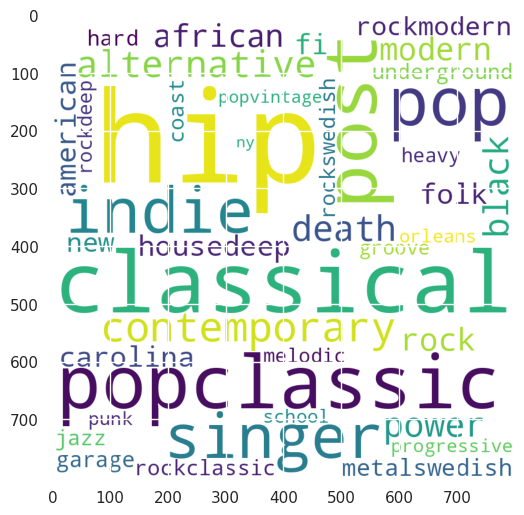

In [28]:
plt.imshow(wordcloud_)

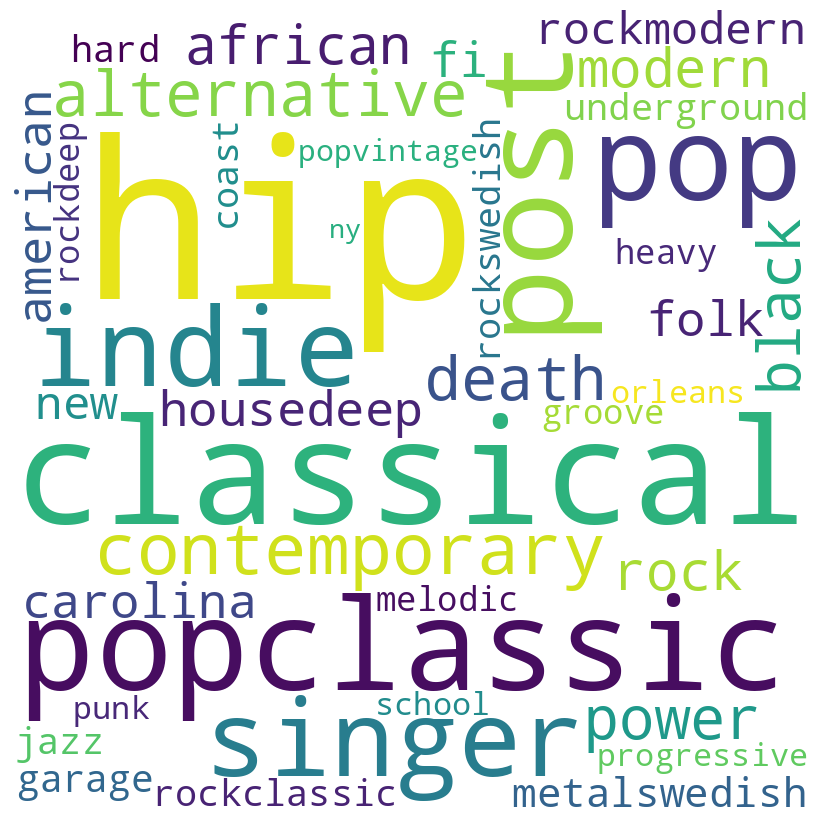

In [29]:
plt.figure(figsize=(8, 8), facecolor=None)
plt.imshow(wordcloud_, interpolation="bilinear")
plt.axis("off")
plt.tight_layout(pad=0)

plt.show()

In [30]:
artists = ''.join(artist_data['artists'].tolist())

In [31]:
wordcloud2 = WordCloud(width=800, height=800, background_color='white',
          min_word_length=3, max_words=40, min_font_size=10).generate(artists)

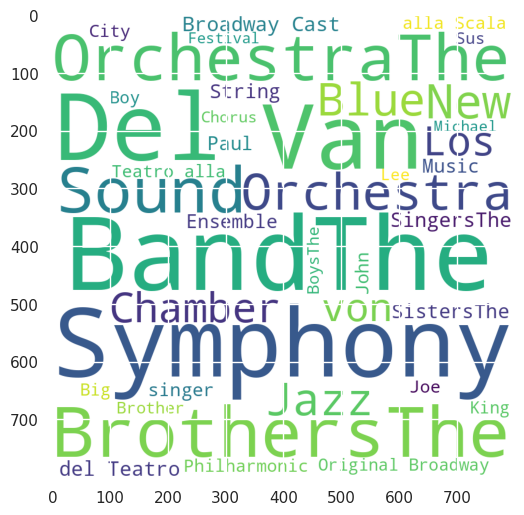

In [32]:
plt.imshow(wordcloud2)

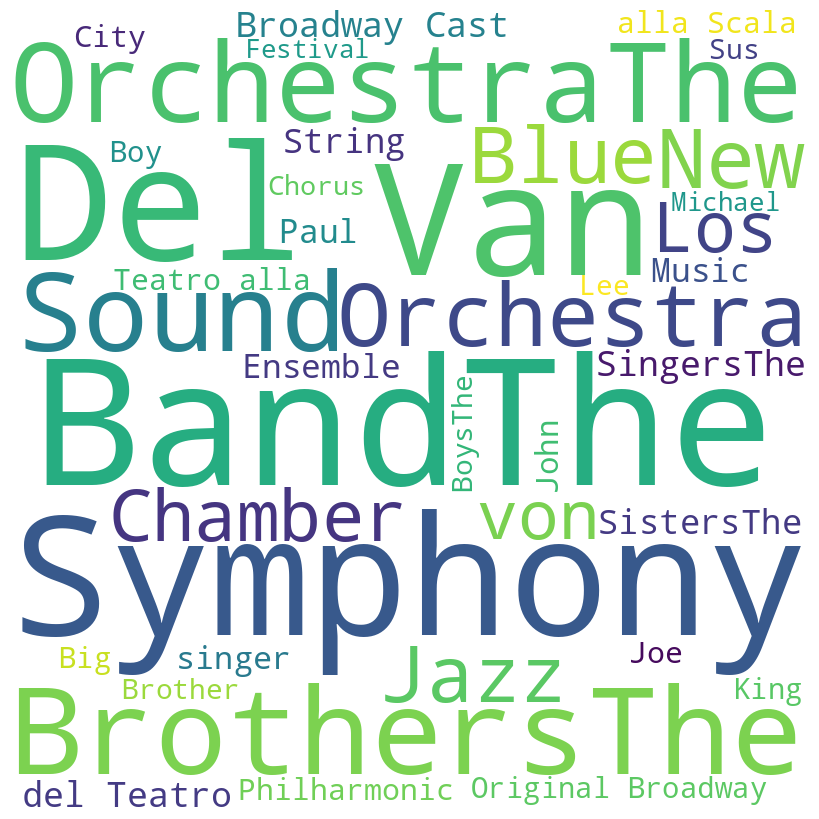

In [33]:
plt.figure(figsize=(8, 8), facecolor=None)
plt.imshow(wordcloud2, interpolation="bilinear")
plt.axis("off")
plt.tight_layout(pad=0)

plt.show()

In [34]:
artist_data.head()

,mode,count,acousticness,artists,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity,key
0,1,9,0.590111,"""Cats"" 1981 Original London Cast",0.467222,250318.555556,0.394003,0.011400,0.290833,-14.448000,0.210389,117.518111,0.389500,38.333333,5
1,1,26,0.862538,"""Cats"" 1983 Broadway Cast",0.441731,287280.000000,0.406808,0.081158,0.315215,-10.690000,0.176212,103.044154,0.268865,30.576923,5
2,1,7,0.856571,"""Fiddler On The Roof” Motion Picture Chorus",0.348286,328920.000000,0.286571,0.024593,0.325786,-15.230714,0.118514,77.375857,0.354857,34.857143,0
3,1,27,0.884926,"""Fiddler On The Roof” Motion Picture Orchestra",0.425074,262890.962963,0.245770,0.073587,0.275481,-15.639370,0.123200,88.667630,0.372030,34.851852,0
4,1,7,0.510714,"""Joseph And The Amazing Technicolor Dreamcoat""...",0.467143,270436.142857,0.488286,0.009400,0.195000,-10.236714,0.098543,122.835857,0.482286,43.000000,5


In [35]:
top10_songs_produced_= artist_data[['count','artists']].sort_values('count', ascending=False)

In [36]:
top10_songs_produced_.head(10)

,count,artists
8367,3169,Francisco Canaro
28561,2422,Эрнест Хемингуэй
28560,2136,Эрих Мария Ремарк
8434,1459,Frank Sinatra
10714,1256,Ignacio Corsini
27109,1200,Vladimir Horowitz
1682,1146,Arturo Toscanini
2707,1103,Billie Holiday
12378,1061,Johnny Cash
7426,1023,Elvis Presley


In [37]:
top10_popular_artists= artist_data[['popularity','artists']].sort_values('popularity', ascending=False)

In [38]:
top10_popular_artists.head(10)

,popularity,artists
20966,93.0,Ritt Momney
14354,92.0,Lele Pons
15070,90.0,Los Legendarios
11764,89.0,Jerry Di
28263,88.0,salem ilese
23687,88.0,Surf Mesa
7463,88.0,Emilee
213,87.0,A7S
26318,86.0,Towy
16453,86.0,Master KG


#Clustering

In [39]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.pipeline import Pipeline

In [40]:
genre_data.head()

,mode,genres,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity,key
0,1,21st century classical,0.979333,0.162883,1.602977e+05,0.071317,0.606834,0.361600,-31.514333,0.040567,75.336500,0.103783,27.833333,6
1,1,432hz,0.494780,0.299333,1.048887e+06,0.450678,0.477762,0.131000,-16.854000,0.076817,120.285667,0.221750,52.500000,5
2,1,8-bit,0.762000,0.712000,1.151770e+05,0.818000,0.876000,0.126000,-9.180000,0.047000,133.444000,0.975000,48.000000,7
3,1,[],0.651417,0.529093,2.328809e+05,0.419146,0.205309,0.218696,-12.288965,0.107872,112.857352,0.513604,20.859882,7
4,1,a cappella,0.676557,0.538961,1.906285e+05,0.316434,0.003003,0.172254,-12.479387,0.082851,112.110362,0.448249,45.820071,7


In [41]:
genre_data['key'].unique()

array([ 6,  5,  7,  1, 10,  2,  9,  4,  0,  8, 11,  3])

In [42]:
x = genre_data.drop(['mode','genres'], axis =1)

In [43]:
scaler = StandardScaler()
scaler.fit(x)
x_scaled = scaler.transform(x)

In [44]:
Kmeans = KMeans(n_clusters=12)
Kmeans.fit(x_scaled)

KMeans(n_clusters=12)

In [45]:
genre_data['clusters'] = Kmeans.predict(x_scaled)

In [46]:
genre_data['clusters']

,clusters
0,11
1,6
2,3
3,3
4,10
...,...
2968,4
2969,5
2970,5
2971,3


In [47]:
from sklearn.manifold import TSNE

In [48]:
tsne = TSNE(n_components=2)
x_tsne = tsne.fit_transform(x_scaled)

In [49]:
genre_df = pd.DataFrame(columns=['x', 'y'], data=x_tsne)
genre_df['genres'] = genre_data['genres']
genre_df['cluster'] = genre_data['clusters']

fig = px.scatter(
    genre_df, x='x', y='y', color='cluster', hover_data=['x', 'y', 'genres'],title="t-SNE visualization of genre clusters"
)
fig.show()

In [129]:
data.rename(columns={'songs':'name'}, inplace=True)

In [130]:
data.head()

,valence,year,acousticness,artists,danceability,duration_ms,energy,explicit,id,instrumentalness,...,liveness,loudness,mode,name,popularity,release_date,speechiness,tempo,decade,cluster_label
0,0.0594,1921,0.982,"Sergei Rachmaninoff, James Levine, Berliner Ph...",0.279,831667,0.211,0,4BJqT0PrAfrxzMOxytFOIz,0.878000,...,0.665,-20.096,1,"Piano Concerto No. 3 in D Minor, Op. 30: III. ...",4,1921,0.0366,80.954,1920's,20
1,0.9630,1921,0.732,Dennis Day,0.819,180533,0.341,0,7xPhfUan2yNtyFG0cUWkt8,0.000000,...,0.160,-12.441,1,Clancy Lowered the Boom,5,1921,0.4150,60.936,1920's,24
2,0.0394,1921,0.961,KHP Kridhamardawa Karaton Ngayogyakarta Hadini...,0.328,500062,0.166,0,1o6I8BglA6ylDMrIELygv1,0.913000,...,0.101,-14.850,1,Gati Bali,5,1921,0.0339,110.339,1920's,20
3,0.1650,1921,0.967,Frank Parker,0.275,210000,0.309,0,3ftBPsC5vPBKxYSee08FDH,0.000028,...,0.381,-9.316,1,Danny Boy,3,1921,0.0354,100.109,1920's,2
4,0.2530,1921,0.957,Phil Regan,0.418,166693,0.193,0,4d6HGyGT8e121BsdKmw9v6,0.000002,...,0.229,-10.096,1,When Irish Eyes Are Smiling,2,1921,0.0380,101.665,1920's,2


In [118]:
data['songs'].unique()

array(['Piano Concerto No. 3 in D Minor, Op. 30: III. Finale. Alla breve',
       'Clancy Lowered the Boom', 'Gati Bali', ...,
       'Halloweenie III: Seven Days', 'AYA',
       'Billetes Azules (with J Balvin)'], dtype=object)

In [119]:
from sklearn.pipeline import Pipeline
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [120]:
cluster_pipeline = Pipeline([('scaler', StandardScaler()),
                                  ('kmeans', KMeans(n_clusters=25,
                                   verbose=False))
                                 ], verbose=False)

X = data.drop(['artists', 'year', 'id', 'songs', 'release_date', 'decade'], axis = 1)
number_cols = list(X.columns)
cluster_pipeline.fit(X)
cluster_labels = cluster_pipeline.predict(X)
data['cluster_label'] = cluster_labels

In [55]:
scaler = cluster_pipeline.named_steps['scaler']
X_scaled = scaler.transform(X)

In [56]:
from sklearn.decomposition import PCA

In [57]:
pca = PCA(n_components=2)

In [58]:
x_pca = pca.fit_transform(X_scaled)
song_df = pd.DataFrame(columns=['x', 'y'], data=x_pca)
song_df['title'] = data['songs']
song_df['cluster'] = data['cluster_label']

fig = px.scatter(
    song_df, x='x', y='y', color='cluster', hover_data=['x', 'y', 'title'])
fig.show()

Output hidden; open in https://colab.research.google.com to view.

In [59]:
x_pca

array([[ 3.91848591,  2.12402373],
       [ 0.31651357, -3.00028536],
       [ 3.43529664,  1.65663456],
       ...,
       [-2.79827271,  0.6695685 ],
       [-2.15856859, -1.08519762],
       [-3.20716701, -1.44018835]])

#Modeling

In [60]:
!pip install spotipy


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 255.6/255.6 kB 6.4 MB/s eta 0:00:00


In [61]:
pip install python-dotenv

In [62]:
import json
with open('/content/kaggle.json', 'r') as file:
  json.load(file)

In [65]:
def get_track_features(track_id):
    features = sp.audio_features(track_id)
    return features[0]

In [67]:
get_track_features('5LyWrLTc2ka2piQoebLmHG')

{'danceability': 0.69,
 'energy': 0.474,
 'key': 0,
 'loudness': -8.063,
 'mode': 0,
 'speechiness': 0.0823,
 'acousticness': 0.609,
 'instrumentalness': 1.12e-06,
 'liveness': 0.0551,
 'valence': 0.366,
 'tempo': 123.553,
 'type': 'audio_features',
 'id': '5LyWrLTc2ka2piQoebLmHG',
 'uri': 'spotify:track:5LyWrLTc2ka2piQoebLmHG',
 'track_href': 'https://api.spotify.com/v1/tracks/5LyWrLTc2ka2piQoebLmHG',
 'analysis_url': 'https://api.spotify.com/v1/audio-analysis/5LyWrLTc2ka2piQoebLmHG',
 'duration_ms': 162692,
 'time_signature': 4}

In [204]:
import spotipy
from spotipy.oauth2 import SpotifyClientCredentials
from collections import defaultdict
import os
import pandas as pd
import dotenv

from dotenv import load_dotenv
load_dotenv()


CLIENT_ID = os.getenv('client_id')
CLIENT_SECRET = os.getenv('client_secret')


sp = spotipy.Spotify(auth_manager=
                     SpotifyClientCredentials(client_id=CLIENT_ID, client_secret=CLIENT_SECRET))

def find_song(name, year):
  results = sp.search(q=f'track: {name} year: {year}', limit=1)
  if not results['tracks']['items']:
      print(f"No song found for {name} in {year}.")
      return None


  track_info = results['tracks']['items'][0]
  track_id = track_info['id']
  audio_features = sp.audio_features(track_id)

  if not audio_features or not audio_features[0]:
      print(f"No audio features available for {name}.")
      return None

  song_data = {
      'name': [name],
      'year': [year],
      'explicit': [int(track_info['explicit'])],
      'duration_ms': [track_info['duration_ms']],
      'popularity': [track_info['popularity']],
      **{key: [value] for key, value in audio_features[0].items()}
  }

  return pd.DataFrame(song_data)

songs = [
    ("Peru", 2021),
    ("Bad Dancer", 2021),
    ("Jaho", 2020),
    ("Rolling in the Deep", 2011),
    ("Bad Guy", 2019),
    ("Away", 2023),
    ("FEM", 2020),
    ("Madoda Sabelani", 2020)
]


song_dfs = []
for song, year in songs:
    song_df = find_song(song, year)
    if song_df is not None:
        song_dfs.append(song_df)

if song_dfs:
    all_songs_df = pd.concat(song_dfs, ignore_index=True)


    all_songs_df.to_csv("spotify_songs.csv", index=False)
    print(all_songs_df)
else:
    print("No valid songs found.")

                  name  year  explicit  duration_ms  popularity  danceability  \
0                 Peru  2021         0       174942          31         0.819   
1           Bad Dancer  2021         1       326907          54         0.640   
2                 Jaho  2020         1       113607          12         0.520   
3  Rolling in the Deep  2011         0       228093          79         0.730   
4              Bad Guy  2019         1       253258          31         0.620   
5                 Away  2023         0        79041          34         0.537   
6                  FEM  2020         1       326907          54         0.640   
7      Madoda Sabelani  2020         0       247579          47         0.592   

   energy  key  loudness  mode  ...  instrumentalness  liveness  valence  \
0   0.366    1   -10.057     1  ...          0.000135    0.0820    0.387   
1   0.652    5    -5.070     1  ...          0.000000    0.0814    0.273   
2   0.611    2    -8.848     0  ...       

In [142]:
from collections import defaultdict
from sklearn.metrics import euclidean_distances
from scipy.spatial.distance import cdist
import difflib

In [209]:

def get_playlist_tracks(playlist_id):
    tracks = []
    results = sp.playlist_tracks(playlist_id)
    tracks.extend(results['items'])

    while results['next']:
        results = sp.next(results)
        tracks.extend(results['items'])

    return tracks



def extract_track_data(track):
    track_info = track['track']
    track_id = track_info['id']
    audio_features = sp.audio_features(track_id)[0]

    return {
        'name': track_info['name'],
        'artists': ', '.join([artist['name'] for artist in track_info['artists']]),
        'album': track_info['album']['name'],
        'release_date': track_info['album']['release_date'],
        'popularity': track_info['popularity'],
        'duration_ms': track_info['duration_ms'],
        'explicit': track_info['explicit'],
        'year': track_info['album']['release_date'][:4],
        'valence': audio_features.get('valence'),
        'energy': audio_features.get('energy'),
        'danceability': audio_features.get('danceability'),
        'acousticness': audio_features.get('acousticness'),
        'instrumentalness': audio_features.get('instrumentalness'),
        'liveness': audio_features.get('liveness'),
        'loudness': audio_features.get('loudness'),
        'speechiness': audio_features.get('speechiness'),
        'tempo': audio_features.get('tempo'),
        'key': audio_features.get('key'),
        'mode': audio_features.get('mode'),

    }



playlist_ids = [
    '37i9dQZF1DXcBWIGoYBM5M',  # Today's Top Hits
    '37i9dQZF1DX0XUsuxWHRQd',  # Global Top 50
    '37i9dQZF1DX4JAvHpjipBk',  # RapCaviar
    '37i9dQZF1DX0kbJZpiYdZl',  # Rock Classics
    '37i9dQZF1DWXRqgorJj26U',  # Chill Hits
]

all_tracks = []


for playlist_id in playlist_ids:
    print(f"Fetching tracks from playlist {playlist_id}")
    tracks = get_playlist_tracks(playlist_id)
    all_tracks.extend(tracks)


track_data = [extract_track_data(track) for track in all_tracks]
spotify_df = pd.DataFrame(track_data)




spotify_df.to_csv('spotify_tracks.csv', index=False)

Fetching tracks from playlist 37i9dQZF1DXcBWIGoYBM5M
Fetching tracks from playlist 37i9dQZF1DX0XUsuxWHRQd
Fetching tracks from playlist 37i9dQZF1DX4JAvHpjipBk
Fetching tracks from playlist 37i9dQZF1DX0kbJZpiYdZl
Fetching tracks from playlist 37i9dQZF1DWXRqgorJj26U


In [181]:
spotify_df.tail(300)

,name,artists,album,release_date,popularity,duration_ms,explicit,year
150,Heartbeat,"2Rare, Lakeyah, Ann Marie",Heartbeat,2024-09-13,42,217731,True,2024
151,mind now (with Skilla Baby),"N3WYRKLA, Skilla Baby",mind now (with Skilla Baby),2024-09-13,40,190072,True,2024
152,Along For The Ride,COIN,I'm Not Afraid Of Music Anymore,2024-09-13,52,177071,False,2024
153,Driver,Soccer Mommy,Driver,2024-09-10,50,252266,False,2024
154,Otra Vez Pegue Un Vergazo,Chino Pacas,Otra Vez Pegue Un Vergazo,2024-09-13,57,169408,True,2024
...,...,...,...,...,...,...,...,...
445,I Want To Hold Your Hand - Remastered 2015,The Beatles,1 (Remastered),2000-11-13,64,145746,False,2000
446,Vienna,Billy Joel,The Stranger (Legacy Edition),1977,81,214240,False,1977
447,Light My Fire,The Doors,The Doors,1967-01-04,69,429760,False,1967
448,Highway to Hell,AC/DC,Highway to Hell,1979-07-27,84,208400,False,1979


In [210]:
columns = ['valence', 'year', 'acousticness', 'danceability', 'duration_ms', 'energy', 'explicit',
           'instrumentalness', 'key', 'liveness', 'loudness', 'mode', 'popularity', 'speechiness', 'tempo']


def get_song_data(song, data):
    try:
        song_data = data[(data['name'] == song['name']) & (data['year'] == song['year'])].iloc[0]
        return song_data

    except IndexError:
        return find_song(song['name'], song['year']) if 'find_song' in globals() else None


In [211]:
get_song_data({'name': "Taste", 'year': 2024}, spotify_df)

,name,year,explicit,duration_ms,popularity,danceability,energy,key,loudness,mode,...,instrumentalness,liveness,valence,tempo,type,id,uri,track_href,analysis_url,time_signature
0,Taste,2024,1,219037,39,0.823,0.599,10,-7.883,0,...,0,0.114,0.533,98.001,audio_features,698pGWtRWAQA6XB8aU2Z7q,spotify:track:698pGWtRWAQA6XB8aU2Z7q,https://api.spotify.com/v1/tracks/698pGWtRWAQA...,https://api.spotify.com/v1/audio-analysis/698p...,4


In [212]:
songs_ = [
    {'name': "Taste", 'year': 2024},
    {'name': "Dancing In The Flames", 'year': 2024},
    {'name': "Jane Says", 'year': 1988},
    {'name': "Rolling in the Deep", 'year': 2011},
    {'name': "Bad Guy", 'year': 2019},
    {'name': "Driver", 'year': 2024},
    {'name': "Born to Run", 'year': 1975},
    {'name': "Madoda Sabelani", 'year': 2020}
]

In [213]:
def get_mean_vector(song_list, spotify_data):

    vectors = []

    for s in song_list:
        song_data = get_song_data(s, spotify_data)
        if song_data is None:
          print(f'Warning: {s} does not exist in Spotify or in database')
          continue
        vector = song_data[columns].values.astype(float)
        vectors.append(vector)

    song_matrix = np.array(list(vectors))
    return np.mean(song_matrix, axis=0)

In [214]:
get_mean_vector(songs_, spotify_df)

array([[ 4.76250000e-01,  2.01062500e+03,  2.20940000e-01,
         5.50625000e-01,  2.47148875e+05,  7.00625000e-01,
         2.50000000e-01,  3.99125000e-06,  5.75000000e+00,
         1.08900000e-01, -6.98325000e+00,  8.75000000e-01,
         5.48750000e+01,  8.50125000e-02,  1.27179125e+02]])

In [215]:
def flatten_dict_list(dict_list):

    flattened_dict = defaultdict()
    for key in dict_list[0].keys():
        flattened_dict[key] = []

    for dictionary in dict_list:
        for key, value in dictionary.items():
            flattened_dict[key].append(value)

    return flattened_dict

In [216]:
flatten_dict_list(songs_)

defaultdict(None,
            {'name': ['Taste',
              'Dancing In The Flames',
              'Jane Says',
              'Rolling in the Deep',
              'Bad Guy',
              'Driver',
              'Born to Run',
              'Madoda Sabelani'],
             'year': [2024, 2024, 1988, 2011, 2019, 2024, 1975, 2020]})

In [222]:
def recommend_songs( song_list, spotify_data, n_songs=10):

    metadata_columns = ['name', 'year', 'artists']
    song_dict = flatten_dict_list(song_list)

    song_center = get_mean_vector(song_list, spotify_data)
    scaler = cluster_pipeline.steps[0][1]
    scaled_data = scaler.fit_transform(spotify_data[columns])
    scaled_song_center = scaler.transform(song_center.reshape(1, -1))
    distance = cdist(scaled_song_center, scaled_data, 'cosine')
    index = list(np.argsort(distance)[:, :n_songs][0])

    rec_songs = spotify_data.iloc[index]
    rec_songs = rec_songs[~rec_songs['name'].isin(song_dict['name'])]
    return rec_songs[metadata_columns].to_dict(orient='records')

In [223]:
recommend_songs(songs_, spotify_df)

[{'name': 'You And I', 'year': '2024', 'artists': 'London Grammar'},
 {'name': 'Blessings', 'year': '2024', 'artists': 'Yolanda Adams'},
 {'name': 'Somebody To Love - Remastered 2011',
  'year': '1976',
  'artists': 'Queen'},
 {'name': 'What A Woman Can Do', 'year': '2024', 'artists': 'Maddie & Tae'},
 {'name': 'Free Bird', 'year': '1973', 'artists': 'Lynyrd Skynyrd'},
 {'name': 'More Than a Feeling', 'year': '1976', 'artists': 'Boston'},
 {'name': 'feminine adornments', 'year': '2024', 'artists': 'julie'},
 {'name': 'dead giveaway', 'year': '2024', 'artists': 'Nemahsis'},
 {'name': 'Edge of Seventeen - 2016 Remaster',
  'year': '2016',
  'artists': 'Stevie Nicks'},
 {'name': 'What Kinda Man', 'year': '2024', 'artists': 'Parker McCollum'}]

In [224]:
recommendations = recommend_songs(songs_, spotify_df)

print("Recommended Songs:")

Recommended Songs:
{'name': 'You And I', 'year': '2024', 'artists': 'London Grammar'}
{'name': 'Blessings', 'year': '2024', 'artists': 'Yolanda Adams'}
{'name': 'Somebody To Love - Remastered 2011', 'year': '1976', 'artists': 'Queen'}
{'name': 'What A Woman Can Do', 'year': '2024', 'artists': 'Maddie & Tae'}
{'name': 'Free Bird', 'year': '1973', 'artists': 'Lynyrd Skynyrd'}
{'name': 'More Than a Feeling', 'year': '1976', 'artists': 'Boston'}
{'name': 'feminine adornments', 'year': '2024', 'artists': 'julie'}
{'name': 'dead giveaway', 'year': '2024', 'artists': 'Nemahsis'}
{'name': 'Edge of Seventeen - 2016 Remaster', 'year': '2016', 'artists': 'Stevie Nicks'}
{'name': 'What Kinda Man', 'year': '2024', 'artists': 'Parker McCollum'}


In [225]:
for i, song in enumerate(recommendations, 1):
    print(f"{i}. {song['name']} by {song['artists']} ({song['year']})")

1. You And I by London Grammar (2024)
2. Blessings by Yolanda Adams (2024)
3. Somebody To Love - Remastered 2011 by Queen (1976)
4. What A Woman Can Do by Maddie & Tae (2024)
5. Free Bird by Lynyrd Skynyrd (1973)
6. More Than a Feeling by Boston (1976)
7. feminine adornments by julie (2024)
8. dead giveaway by Nemahsis (2024)
9. Edge of Seventeen - 2016 Remaster by Stevie Nicks (2016)
10. What Kinda Man by Parker McCollum (2024)
